# MASCHINELLES LERNEN MIT EMPIRISCHEN DATEN

## Projektarbeit | Data Exploration & Preprocessing

## Vorbereitung

1. Laden Sie den per Mail zugewiesenen Datensatz Ihrer Gruppe herunter.
* done

2. Überprüfen Sie, ob Sie im Gitlab1 auf Ihr individuelles Praktikumsrepository zugreifen können.
* eigenes Repo https://git.informatik.uni-leipzig.de/ds41wywi/mled-group-7

3. Legen Sie in einem neuen Ordner „Preprocessing“ ein neues Jupyter-Notebook an.
* Ordner MALDI_PROCESSED für konsitente Namensgebung

4. Formulieren Sie in 3-4 ganzen Sätzen das Ziel Ihrer Projektarbeit (= Fragestellung), so wie Sie sie verstanden haben, und fügen diesen Textblock am Anfang Ihres Notebooks ein.
+ Handelt es sich um eine Klassifikations-, Regressions- oder Clustering-Aufgabe?

Aufgabe:

"Sie streben eine möglichst gute Klassifikation der Bakterienspezies an, an denen die jeweilige Messung erhoben wurde. Untersuchen Sie dazu, ob sich mittels Clustering (sinnvolle) Subtasks identifzieren lassen, d.h. ob sich dadurch Teilmengen von Samples finden lassen, die sich mit höherer Zuverlässigkeit klassifizieren lassen als der Datensatz ingesamt."

- Es ist eine Klassifikationsaufgabe, in der versucht werden soll Bakterienspezies einer Messung vorherzusagen.
- Es soll auch untersucht werden ob bestimmte Teile des Datensatzes besser zur Klassifikation geeignet sind.
    - Falls ja könnte man auch die Eignung für Zuordnung eines Messwertes predicten, und einen Confidence-Score implementieren.

## Aufgaben

1. Bestimmen Sie folgende Eigenschaften des Datensatzes:
- Anzahl Samples
- Anzahl Features
- Skalen der Features (nominal/ordinal/metrisch)
    - nominal: unsortierbar
    - ordinal: sortierbar, Abstände zwischen Elementen ohne Bedeutung
    - metrisch: sortierbar, Abstände zwischen Elementen interpretierbar
- Häufigkeit fehlender Werte, ggf. Zielparameter.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

intensity = pd.read_csv("./MALDI_DATA/intensity_5.csv")
mass = pd.read_csv("./MALDI_DATA/mass_5.csv")
meta = pd.read_csv("./MALDI_DATA/meta_5.csv")
peaklist = pd.read_csv("./MALDI_DATA/peaklist_5.csv")

- a) Intensity

In [2]:
data_temp = intensity

print("Samples: " + str(data_temp.shape[0]))
print("\nFeatures: " + str(data_temp.shape[1]))
print("\nDatentypen:\n" + str(data_temp.dtypes))

#print("\nSample:\n" + str(data_temp.head()))
#print("\nStruktur:\n" + str(data_temp.describe()))

Samples: 859

Features: 21648

Datentypen:
Unnamed: 0          int64
index_name         object
intensity1          int64
intensity2          int64
intensity3          int64
                   ...   
intensity21642    float64
intensity21643    float64
intensity21644    float64
intensity21645    float64
intensity21646    float64
Length: 21648, dtype: object


- Samples: 859
- Features: 21648

- 'index_name' und 'Unnamed': 0 sind nominal
- 'intensity(n>0)' Werte sind alle metrisch
- Nach Messung besteht Datenstruktur nichr mehr aus Werten in int64 sondern aus NaN-Values in float64
    - diese können durch 0 ersetzt werden

In [3]:
len(data_temp['Unnamed: 0'].unique()) == data_temp.shape[0]

True

- Jede Zeile besitzt eine ID
    - Spalte 'Unnamed: 0'
- Die Werte dieser Spalte sind in diesem Datenset unique
- Zuordnung könnte in einigen Fällen über Extract aus Namen erfolgen ... metadaten besser geeignet

- b) mass

In [4]:
data_temp = mass

print("Samples: " + str(data_temp.shape[0]))
print("\nFeatures: " + str(data_temp.shape[1]))
print("\nDatentypen:\n" + str(data_temp.dtypes))

#print("\nSample:\n" + str(data_temp.head()))
#print("\nStruktur:\n" + str(data_temp.describe()))

Samples: 859

Features: 21648

Datentypen:
Unnamed: 0      int64
index_name     object
mass1         float64
mass2         float64
mass3         float64
               ...   
mass21642     float64
mass21643     float64
mass21644     float64
mass21645     float64
mass21646     float64
Length: 21648, dtype: object


- Samples: 859
- Features: 21648

- 'index_name' und 'Unnamed': 0 sind nominal
- 'mass(n>0)' Werte sind alle metrisch
- Datenstruktur der Massewerte besteht aus Werten in float64, nach Messung sind alle NaN-Values
    - diese können durch 0.0 ersetzt werden

In [5]:
all((data_temp['Unnamed: 0'].values == intensity['Unnamed: 0'].values))

True

- Spalte 'Unnamed: 0' ist identische zu der in intnesity
    - und kann sowohl als Id als auch zum mergen beider Datensätze genutzt werden

- c) meta

In [6]:
data_temp = meta

print("Samples: " + str(data_temp.shape[0]))
print("\nFeatures: " + str(data_temp.shape[1]))


print("\nZeilennamen:\n" + str(data_temp.columns))
#print("\nDatentypen:\n" + str(data_temp.dtypes))
#print("\nSample:\n" + str(data_temp.head()))
#print("\nStruktur:\n" + str(data_temp.describe()))

Samples: 859

Features: 60

Zeilennamen:
Index(['Unnamed: 0', 'index_name', 'tax', 'gen', 'spe', 'str', 'byteOrder',
       'number', 'timeDelay', 'timeDelta', 'calibrationConstants.c1',
       'calibrationConstants.c2', 'calibrationConstants.c3',
       'hpcLimits.minMass', 'hpcLimits.maxMass', 'hpcOrder', 'hpcUse',
       'v1tofCalibration', 'lift1', 'lift2', 'tlift', 'dataType', 'dataSystem',
       'spectrometerType', 'inlet', 'ionizationMode', 'date',
       'acquisitionMethod', 'acquisitionDate', 'acquisitionMode', 'tofMode',
       'acquisitionOperatorMode', 'laserAttenuation', 'comments1', 'comments2',
       'comments3', 'comments4', 'deflection', 'digitizerType',
       'deflectionPulserCal1', 'deflectionPulserMass', 'flexControlVersion',
       'id', 'instrument', 'instrumentId', 'instrumentType', 'massError',
       'laserShots', 'patch', 'path', 'laserRepetition', 'spot',
       'spectrumType', 'targetCount', 'targetIdString', 'targetSerialNumber',
       'targetTypeNumber

- Samples: 859
- Features: 60

- viele String/Object Daten, die meisten nominal
    - mögliche Ausnahmen z.B. Spot, kodiert punkt, könnte möglicherweise in zwei ordinale Werte kodiert werden
    
- Features dieses Datensatzes sollten weitgehend ignoriert werden
    - einige Features bei Bedarf für Normalisierungen einsetzen
        - timeDelay, timeDelta, calibrationConstants.c1, calibrationConstants.c2, calibrationConstants.c3, hpcLimits.minMass, hpcLimits.maxMass, hpcOrder
    - mglw. einfach drop all strings merge into trainings set + hotcode some interesing variables

In [7]:
all((data_temp['Unnamed: 0'].values == intensity['Unnamed: 0'].values))

True

- Spalte 'Unnamed: 0' ist identische zu der in intnesity
    - und kann sowohl als Id als auch zum mergen beider Datensätze genutzt werden

- d) peaklist

In [8]:
data_temp = peaklist

print("Samples: " + str(data_temp.shape[0]))
print("\nFeatures: " + str(data_temp.shape[1]))
print("\nDatentypen:\n" + str(data_temp.dtypes))

#print("\nSample:\n" + str(data_temp.head()))
#print("\nStruktur:\n" + str(data_temp.describe()))

Samples: 859

Features: 124

Datentypen:
Unnamed: 0          int64
mem                 int64
ids                object
pik_posit_1       float64
pik_inten_1       float64
                   ...   
pik_posit_30      float64
pik_inten_30      float64
pik_weight_30     float64
pik_relfreq_30    float64
prm                object
Length: 124, dtype: object


- Samples: 859
- Features: 124

- Spalten 'Unnamed: 0' und 'mem' in in64 sowie 'ids' und 'prm' (Parameters?) in object/string sind nominaö
- die restlichen spalten bestehen aus Werten in metrische Skala: 
    - pik_posit_(n>0)
    - pik_inten_(n>0)
    - pik_weight_(n>0)
    - pik_posit_(n>0)
- die Werte sind auf 30 Peaks pro Datensatz normalisiert
    - andere Struktur als die vorher betrachteten Daten also sollte dieser Datensatz vermutlich vorerst ignoriert werden

In [9]:
all((data_temp['Unnamed: 0'].values == intensity['Unnamed: 0'].values))

True

- Spalte 'Unnamed: 0' ist identische zu der in intnesity
    - und kann sowohl als Id als auch zum mergen beider Datensätze genutzt werden

In [10]:
# variables containing huge datasets but are not used anymore
del data_temp
del peaklist

2. Falls es nicht-numerische Features gibt: Wandeln Sie diese in ein ML-geeignetes Format um.

In [11]:
from sklearn.preprocessing import OneHotEncoder

def onehotfeatures(df, fl):
    temp = df[fl]
    #temp.columns = df[fl].columns
    #df.drop(fl, axis=1)
    temp_enc = OneHotEncoder(handle_unknown='ignore')
    temp = pd.DataFrame(temp_enc.fit_transform(temp).toarray().astype('bool'))
    temp.columns = temp_enc.get_feature_names(df[fl].columns)
    return pd.concat([df.drop(fl, axis=1), temp], axis=1)

In [12]:
pro_ints = intensity.drop('index_name', axis=1)
pro_mass = mass.drop('index_name', axis=1)
val_meta = meta.select_dtypes(include=['float64','int64','bool'])#.astype('float64')
bol_meta = meta.select_dtypes(include=['bool'])
str_meta = meta.select_dtypes(include=['object'])

str_meta.fillna("NaN")
enc = OneHotEncoder(handle_unknown='ignore')

enc_str_meta = pd.DataFrame(enc.fit_transform(str_meta).toarray().astype('float'))
enc_str_meta.columns = enc.get_feature_names(str_meta.columns)

In [135]:
bol_meta

hpcUse  v1tofCalibration
0     False             False
1      True             False
2     False             False
3     False             False
4     False             False
..      ...               ...
854    True             False
855   False             False
856   False             False
857    True             False
858   False             False

[859 rows x 2 columns]

* nicht numerisches Feature in intensity und mass sind nur index_name
    * wird durch merge mit meta wieder hergestellt
* metadaten können per onehotencoder umgewandelt werden

3. Falls es Missing Values gibt: Finden Sie eine Lösung und wenden Sie diese an. Begründen Sie.

In [13]:
from sklearn.impute import SimpleImputer

int_imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
mas_imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0.0)# make fill max
met_val_imp = SimpleImputer(missing_values=np.nan, strategy='mean')#mean, median, most_frequent and constant all have pros and cons, metadata after all
#met_str_imp = SimpleImputer(missing_values=np.nan, strategy='median')#actually don't -> instead process before onehotencoding

In [14]:
print(val_meta.shape)
temp = met_val_imp.fit_transform(val_meta)
print(temp.shape)

#print(pd.isnull(val_meta['comments4']).all())
#print(val_meta['comments4'].sum())

(859, 27)
(859, 26)


* die Spalte 'comments4' enthält nur NaN Werte, und muss vorher entfernt werden um Probleme zu vermeiden

In [15]:
if 'comments4' in val_meta.columns:
    val_meta = val_meta.drop('comments4', axis=1)

pro_ints = pd.DataFrame(int_imp.fit_transform(pro_ints), columns=pro_ints.columns).astype(pro_ints.dtypes.to_dict())
pro_mass = pd.DataFrame(mas_imp.fit_transform(pro_mass), columns=pro_mass.columns).astype(pro_mass.dtypes.to_dict())
val_meta = pd.DataFrame(met_val_imp.fit_transform(val_meta), columns=val_meta.columns).astype(val_meta.dtypes.to_dict())
#enc_meta = pd.DataFrame(met_str_imp.fit_transform(enc_meta), columns=enc_meta.columns).astype(enc_meta.dtypes.to_dict())

pro_meta_encoded = pd.concat([val_meta, enc_str_meta], axis=1)#pro_meta

In [16]:
pro_meta_encoded.head()

Unnamed: 0   number  timeDelay  timeDelta  calibrationConstants.c1  \
0      4421.0  33000.0    28000.0        2.0             2.302823e+06   
1      6172.0  33000.0    28000.0        2.0             2.308389e+06   
2      4582.0  33000.0    28000.0        2.0             2.316884e+06   
3      6243.0  20649.0    19632.0        2.0             5.424975e+06   
4      4538.0  33000.0    28000.0        2.0             2.304028e+06   

   calibrationConstants.c2  calibrationConstants.c3  hpcLimits.minMass  \
0               208.107412                -0.013783                0.0   
1               226.150405                -0.008615                0.0   
2               307.637153                -0.002766                0.0   
3               457.636899                -0.012064                0.0   
4               213.845820                -0.011553                0.0   

   hpcLimits.maxMass  hpcOrder  ...  name_Yersinia_pestis_NCTC_2028.H13  \
0                0.0       0.0  ...                                 0.0   
1                0.0       0.0  ...                                 0.0   
2                0.0       0.0  ...                                 0.0   
3                0.0       0.0  ...                                 0.0   
4                0.0       0.0  ...                                 0.0   

   name_Yersinia_pestis_NCTC_570.H12  name_Yersinia_pestis_NCTC_5923.H14  \
0                                0.0                                 0.0   
1                                0.0                                 0.0   
2                                0.0                                 0.0   
3                                0.0                                 0.0   
4                                0.0                                 0.0   

   name_Yersinia_pseudotuberculosis_A269_4b.H20  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   name_Yersinia_pseudotuberculosis_A269_4b.K17  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   name_Yersinia_pseudotuberculosis_CNCTC_22_90.F17  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   

   name_Yersinia_wautersii_DSM27350_01.F13  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   name_Yersinia_wautersii_DSM27350_02.H13  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   name_Yersinia_wautersii_DSM27350_03.F14  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   name_Yersinia_wautersii_DSM27350_04.H14  
0                                      0.0  
1                                      0.0  
2                                      0.0  
3                                      0.0  
4                                      0.0  

[5 rows x 7435 columns]

* wie in 1. beschrieben können die NaN-Werte in intensity und mass einfach durch 0 ersetzt werden.
* unterschieden wird die Ersetzungsmethode für Metadatan:
    * mean für ordinale Zahlenwerte
    * median für encodierte stringwerte

4. Charakterisieren Sie alle Features hinsichtlich ihrer enthaltenen Werte (deskriptive Statistik).

In [17]:
print("shape of intensity: " + str(pro_ints.shape))
print("\nshape of mass: " + str(pro_mass.shape))
print("\nshape of metadata: " + str(pro_meta_encoded.shape) + "\n")

shape of intensity: (859, 21647)

shape of mass: (859, 21647)

shape of metadata: (859, 7435)



In [115]:
# commented for runtime and readability

#print(pro_ints.describe())
#print(pro_mass.describe())
#print(pro_meta_encoded.describe())

- metadaten in pro_meta_encoded sind extrem breit
- bei bedarf einzelne Features ins training einfließen lassen und diese dann Codieren

<AxesSubplot:>

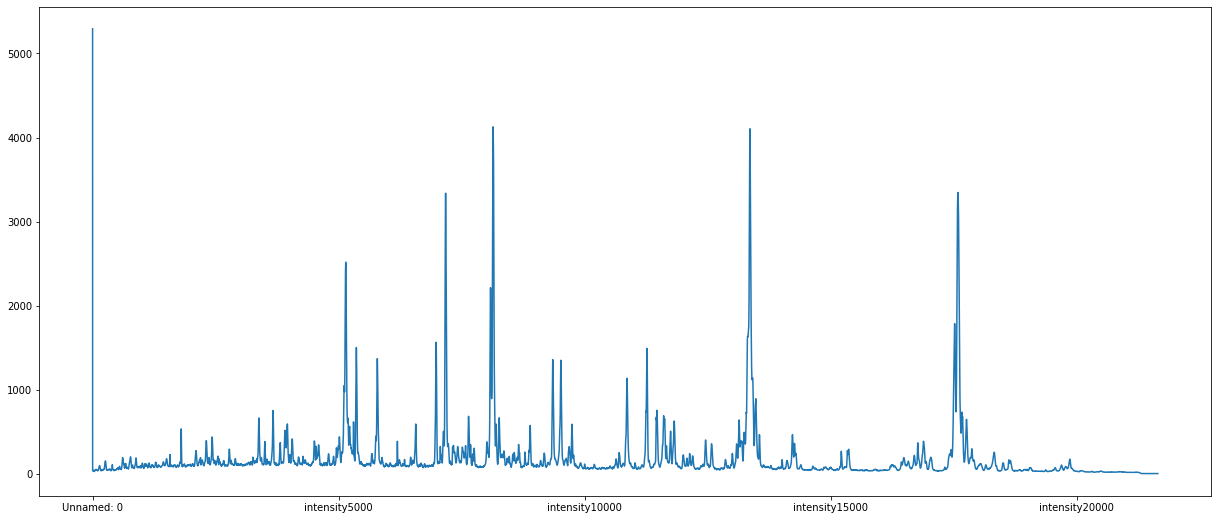

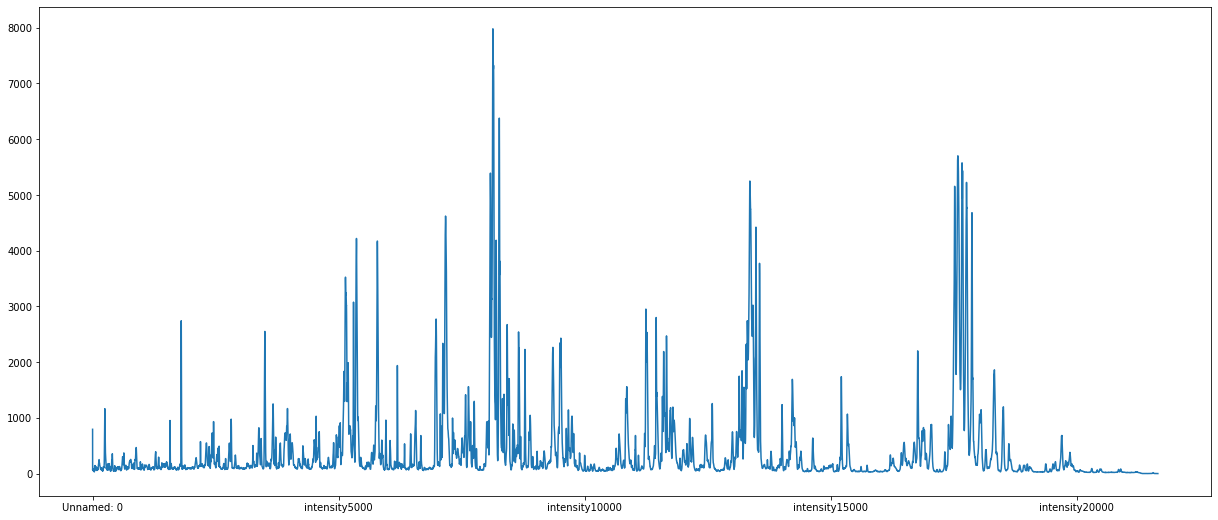

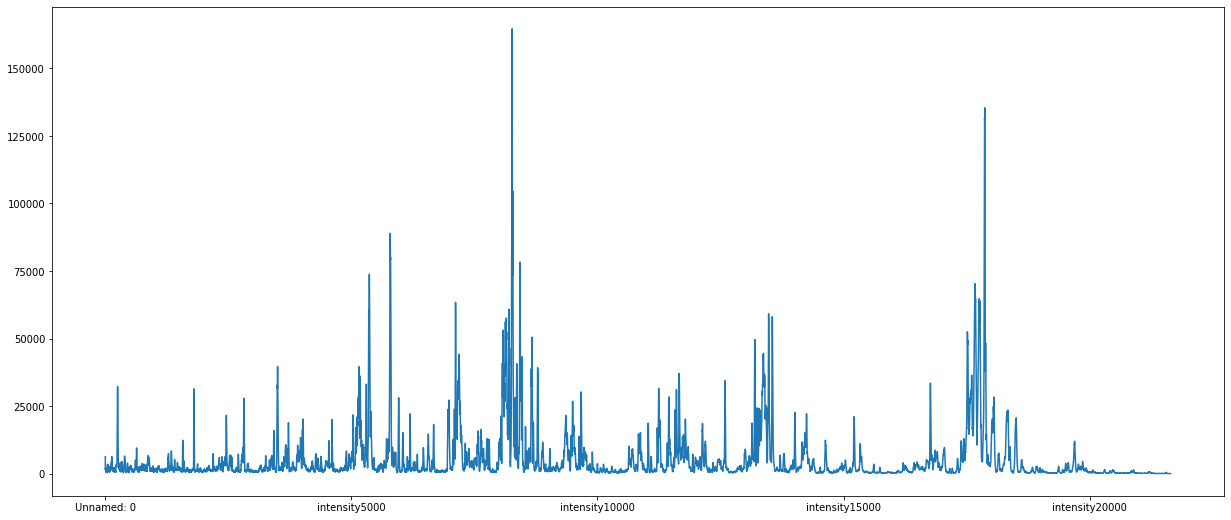

In [18]:
fig = plt.figure(figsize=(21,9))
pro_ints.mean().plot()

fig = plt.figure(figsize=(21,9))
pro_ints.std().plot()

fig = plt.figure(figsize=(21,9))
pro_ints.max().plot()

Graphik:
- intensity
    - mean Haupgruppen
    - std  Nebengruppen
    - max  Outlier

5. Ist der Datensatz nun für überwachtes/ unüberwachtes Lernen geeignet? Begründen Sie.

- fehlende Werte wurden ergänzt
- String/Object Daten wurden encodiert

In [125]:
#processed and coded Dataframes:

#pro_ints
#pro_mass
#pro_meta_encoded

Ja, technisch gesehn schon, jedoch sind weitere Änderungen Vorteilhaft:

# weitere Änderungen

- bessere Ergänzungsstrategie für NaN-Value Ergänzung bei mass: maximalwert einsetzen

In [19]:
pro_mass2 = mass.drop('Unnamed: 0', axis=1).drop('index_name', axis=1).T

fillvals = {}
for c in pro_mass2:
    fillvals[c] = pro_mass2[c].max()
    
pro_mass2 = pro_mass2.fillna(value=fillvals).T
pro_mass2.insert(loc=0, column='Unnamed: 0', value=mass['Unnamed: 0'])#  or no column='Unnamed: 0' to make it actually right?

Graphik:
- mass
    - Vergleich Normalisierung durch Ersetzen der fehlenden Werte mit dem Maximum der jeweiligen Zeitreihe
        - deutliche Glättung der Kurven

<AxesSubplot:>

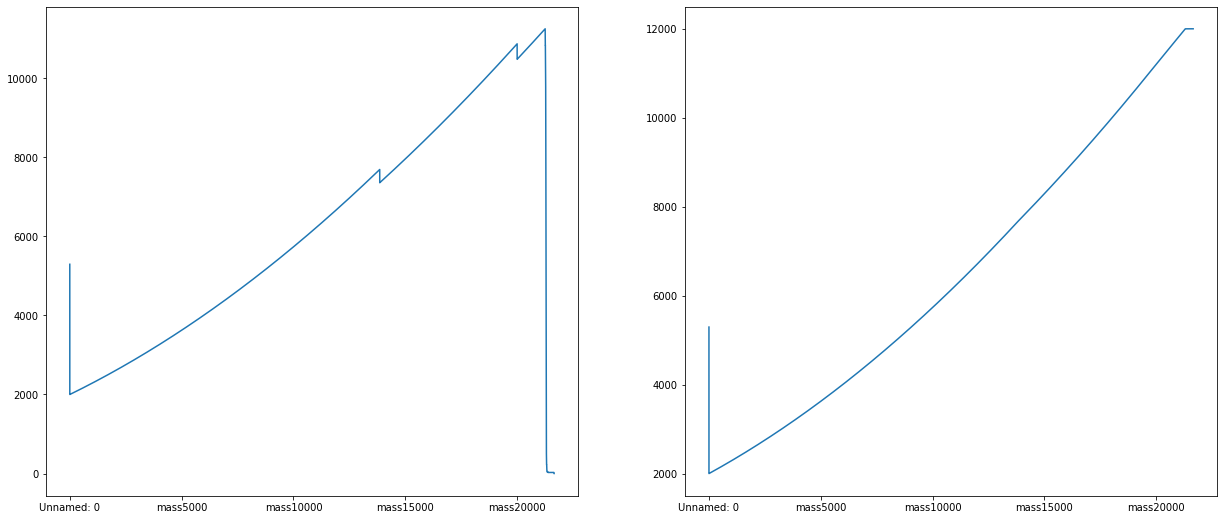

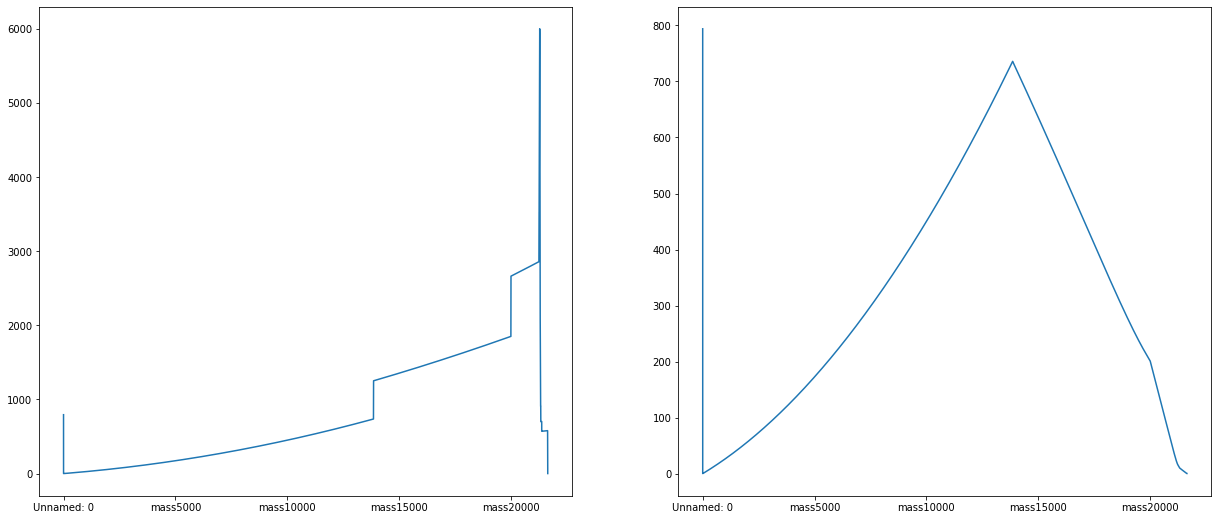

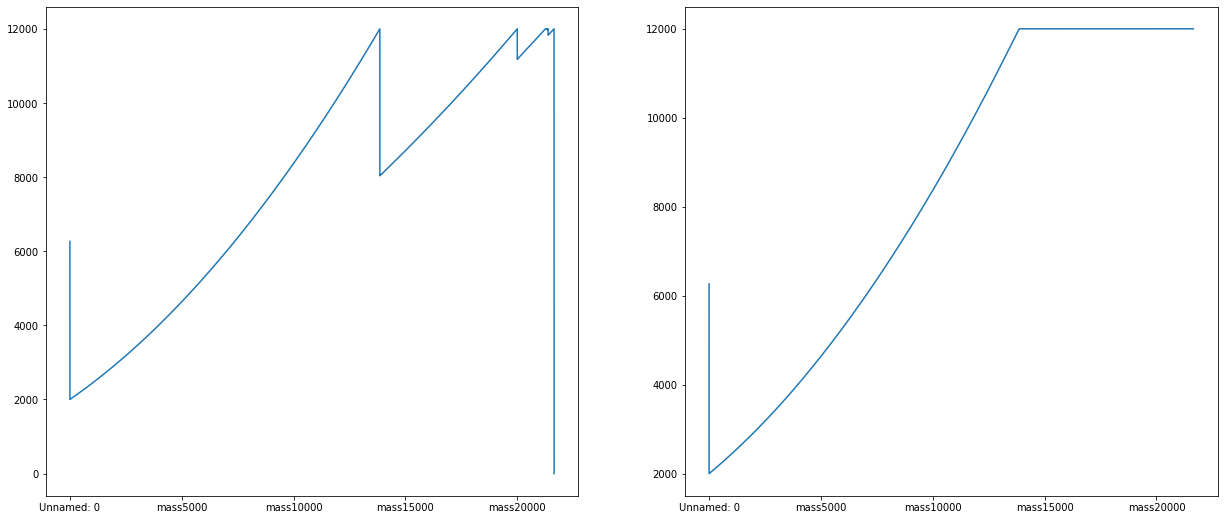

In [20]:
fig = plt.figure(figsize=(21,9))
ax = fig.subplots(1,2)
pro_mass.mean().plot(ax=ax[0])
pro_mass2.mean().plot(ax=ax[1])

fig = plt.figure(figsize=(21,9))
ax = fig.subplots(1,2)
pro_mass.std().plot(ax=ax[0])
pro_mass2.std().plot(ax=ax[1])

fig = plt.figure(figsize=(21,9))
ax = fig.subplots(1,2)
pro_mass.max().plot(ax=ax[0])
pro_mass2.max().plot(ax=ax[1])

- in Metadaten existieren Columns mit nur identischen Werten, entfernen dieser:

In [21]:
#Funktion to check if all values of a metadata column are identical -> junk
def unique_cols(df):
    a = df.to_numpy() # df.values (pandas<0.24)
    return (a[0] != a).any(0)

uni_col_names = meta.columns[unique_cols(meta)]

uni_meta = meta[uni_col_names]
if 'comments4' in uni_meta.columns:
    uni_meta = uni_meta.drop('comments4', axis=1)

display(uni_meta)
#display(uni_meta.dtypes)
#display(uni_meta.columns)

Unnamed: 0                                         index_name  \
0          4421  sEnterococcus_feacium_hospital_CC17_UW_3535__S...   
1          6172             sLMTG23N10_0.N10.T_0209519_0001436_154   
2          4582  sEnterococcus_feacium_human_CC5_CC22_AK_EM26.N...   
3          6243  sB03_CVUAS_4962.B3.G_C9389B2A_6AFA_4B8E_AC6BAB...   
4          4538                       s3.N22.T_0209519_0001436_223   
..          ...                                                ...   
854        5962              sLMTG22H12_0.H12.T_0209520_0000757_29   
855        4276  sEnterococcus_faecalis_10.N9.T_0209520_0020000_56   
856        4545  sEnterococcus_feacium_hospital_CC17_UW_7725__S...   
857        5926              sLMTG22E13_0.E13.T_0209520_0000757_29   
858        6051  sYersinia_nurmii_DSM22296_03.F12.T_0209520_002...   

                                     tax           gen                 spe  \
0            Enterococcus faecium UW3535  Enterococcus             faecium   
1      Yersinia pseudotuberculosis 29490      Yersinia  pseudotuberculosis   
2           Enterococcus faecium AK-EM26  Enterococcus             faecium   
3             Yersinia similis DSM 18211      Yersinia             similis   
4      Enterococcus faecium UW6990(van-)  Enterococcus             faecium   
..                                   ...           ...                 ...   
854  Yersinia enterocolitica O:7,8 30344      Yersinia      enterocolitica   
855             Enterococcus faecalis 10  Enterococcus            faecalis   
856          Enterococcus faecium UW7725  Enterococcus             faecium   
857   Yersinia enterocolitica O:3 RK/111      Yersinia      enterocolitica   
858            Yersinia nurmii DSM 22296      Yersinia              nurmii   

              str  number  timeDelay  calibrationConstants.c1  \
0          UW3535   33000      28000             2.302823e+06   
1           29490   33000      28000             2.308389e+06   
2         AK-EM26   33000      28000             2.316884e+06   
3       DSM 18211   20649      19632             5.424975e+06   
4    UW6990(van-)   33000      28000             2.304028e+06   
..            ...     ...        ...                      ...   
854   O:7,8 30344   33000      28000             2.317661e+06   
855            10   33000      28000             2.316741e+06   
856        UW7725   33000      28000             2.306331e+06   
857    O:3 RK/111   33000      28000             2.315414e+06   
858     DSM 22296   33000      28000             2.323205e+06   

     calibrationConstants.c2  ...  \
0                 208.107412  ...   
1                 226.150405  ...   
2                 307.637153  ...   
3                 457.636899  ...   
4                 213.845820  ...   
..                       ...  ...   
854               300.658926  ...   
855               316.850740  ...   
856               221.583476  ...   
857               281.504830  ...   
858               307.717871  ...   

                                                  path  laserRepetition spot  \
0    S:\maldidaten\2011\110303\LMTG90K11_0\0_K11\1\...        10.000000  K11   
1             D:\data\051007\LMTG23N10_0\0_N10\1\1SLin        20.000000  NaN   
2    O:\ZBS6\P25\MALDI group\DB-Stef-Mar\MALDI\von ...         5.000000  N11   
3    D:\Data\MaldiBiotyperRealTimeClassification\13...        60.000000   B3   
4    S:\maldidaten\2010\101104\LMTG86N22_0\0_N22\1\...        10.000000  N22   
..                                                 ...              ...  ...   
854           D:\data\050909\LMTG22H12_0\0_H12\1\1SLin        20.000000  NaN   
855  S:\herforts\Laschp\DB - Box neu-Proben\2011092...         6.666666   N9   
856  S:\KairaP\28-06-2011\Enterococcus faecium\0_N1...        10.000000  N12   
857           D:\data\050909\LMTG22E13_0\0_E13\1\1SLin        20.000000  NaN   
858  T:\Autoflex1\2015\151125\Yersinia_nurmii_DSM22...        10.000000  F12   

    targetCount                         

- Teilen der Metadaten in: (händische Entscheidung auf individueller Basis)
    - Datensatz zum trainieren (z.B. parameter)
    - Datensatz zum validieren (index_name, sampleName, fullName, name, Unnamed '0', tax, gen, spe, str etc.)
    - Junkdaten, die wahrscheinlich keine Verwendung finden
        
- use unnamed: 0 to merge all 3 dataframes
- already deleted 'comments4' (all NaN Values)

### training:
'timeDelay', 'calibrationConstants.c1', 'calibrationConstants.c2', 'calibrationConstants.c3', 'hpcUse', 'laserAttenuation', 'massError', 'laserShots', 'laserRepetition'

### validation:
'index_name', 'tax', 'gen', 'spe', 'str', 'sampleName', 'fullName', 'name'

### junk:

#### irrelevant:
all columns with no unique values: (20 or so rows)
'id', 'patch', 'path', 'spot'

#### unknown type of data or how to properly use:
'number', 'targetCount', 'targetIdString', 'targetSerialNumber', 'targetTypeNumber'

#### might contain/introduce batch-bias without learnable information or outright be validating data:
'acquisitionDate', 'comments2', 'comments3', 'acquisitionMethod', 'acquisitionMode', 'deflection', 'digitizerType', 'deflectionPulserMass', 'flexControlVersion', 'instrumentId', 'instrumentType'

##### notes:
deflection has only True Values (and NaN's coding for false)
-> but dataframe encodes it as object

In [22]:
#disect metadata into 3 Frames: Training, Validation, Junk

meta_train = uni_meta[['Unnamed: 0', 'timeDelay', 'calibrationConstants.c1', 'calibrationConstants.c2', 'calibrationConstants.c3', 'hpcUse', 'laserAttenuation', 'massError', 'laserShots', 'laserRepetition']]
meta_valid = uni_meta[['Unnamed: 0', 'index_name', 'tax', 'gen', 'spe', 'str', 'sampleName', 'fullName', 'name']]

#impute?
print(meta_train.isnull().values.any())
print(meta_valid.isnull().values.any())

print(meta_train.shape)
print(meta_valid.shape)

False
False
(859, 10)
(859, 9)


- keine fehlenden Daten in den ausgewählten columns, kein verfollständigen nötig

In [25]:
#oneshot
meta_train = onehotfeatures(meta_train, meta_train.select_dtypes(include=['object']).columns)

# training frames: merge intensity, mass and metaTrain
training_bare = pro_ints
training_mass = pd.merge(pro_ints, pro_mass2, on='Unnamed: 0')
training_meta = pd.merge(meta_train, pro_ints, on='Unnamed: 0')
training_full = pd.merge(training_meta, pro_mass2, on='Unnamed: 0')

# validation Frame:
validation_raw = meta_valid
validation_enc = onehotfeatures(meta_valid, meta_valid.select_dtypes(include=['object']).columns)
#don't extract or save junkframe

- für überwachte Verfahren werden Labels zum trainieren und predicten benötigt
- dieser (technisch gesehen) Preprocessing Schritt wird im Clustering Notebook vorgenommen
    - LabelEncoder besitzt umgekehrte Transformation, um Klassenlabels wieder als String auslesen zu können
        - dieser muss aber dort initialisiert sein

In [ ]:
# assign Labels für Spezieskodierung
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
validation_spe = pd.DataFrame(le.fit_transform(validation_raw['spe']))

- möglicherweise Datenreduktion durch Bownsampling
    - Rohdaten in Zeitreihen pro Sample schwer bis gar nicht kürzbar ohne massiven Informationsverlust
    - anfertigen eines Subsets an Daten?

6. Überlegen Sie sich passend zu ihrer Forschungsfrage geeignete Vorverarbeitungsschritte und führen Sie diese durch.

- unsupervised learning, benötigt keine besonders ausführiche Vorbereitung
- downsampling oder binning?


- vorhalten verschiedener Kategorien

## Anspeichern der Preprocessing Ergebnisse

In [24]:
# bare intensity as training data
pd.DataFrame(training_bare).to_csv(r'MALDI_PROCESSED/training_bare.csv', index = False)
#display(pd.read_csv("./MALDI_PROCESSED/training_bare.csv"))

# training data without metadata
pd.DataFrame(training_mass).to_csv(r'MALDI_PROCESSED/training_mass.csv', index = False)
#display(pd.read_csv("./MALDI_PROCESSED/training_mass.csv"))

# training data without mass
pd.DataFrame(training_meta).to_csv(r'MALDI_PROCESSED/training_meta.csv', index = False)
#display(pd.read_csv("./MALDI_PROCESSED/training_meta.csv"))

# complete training data
pd.DataFrame(training_full).to_csv(r'MALDI_PROCESSED/training_full.csv', index = False)
#display(pd.read_csv("./MALDI_PROCESSED/training_full.csv"))

# validation data with raw string columns
pd.DataFrame(validation_raw).to_csv(r'MALDI_PROCESSED/validation_raw.csv', index = False)
#display(pd.read_csv("./MALDI_PROCESSED/validation_raw.csv"))

# encoded validation data
pd.DataFrame(validation_enc).to_csv(r'MALDI_PROCESSED/validation_enc.csv', index = False)
#display(pd.read_csv("./MALDI_PROCESSED/validation_enc.csv"))

## Dokumentation

1. Beschreiben Sie Ihre Lösung bzw. Arbeitsschritte für jede der obigen Aufgaben in 3-4 ganzen Sätzen und fügen Sie jeden Textblock als eigene Markdown-Zelle vor dem zugehörigen Code im Notebook ein.

2. Strukturieren Sie Ihr Notebook, indem Sie Überschriften einführen.

3. Speichern Sie Ihr Notebook und kommitten Sie die Änderungen ins Praktikums-Git.